# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I, **Team GM5**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
import plotly.express as px
pd.set_option('max_columns', 200)

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Time series imports
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [506]:
# load data
train_data = pd.read_csv('df_train.csv')
test_data = pd.read_csv('df_test.csv') 

In [507]:
# view train and test shape
print('Train_data shape: {}'.format(train_data.shape))
print('Test_data shape: {}'.format(test_data.shape))

Train_data shape: (8763, 49)
Test_data shape: (2920, 48)


In [508]:
# view train info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Firstly, we are going to convert the 'time' column from an object into a datetime column. 

In [509]:
#train_data['time'] = pd.to_datetime(train_data['time'], utc=True)+timedelta(hours=1) 

Secondly, we shall proceed to partially clean the dataset and drop the unnamed column. Furthermore, we shall proceed to adjust and sort the columns and indexes. 

In [510]:
# train data preview
train_data.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [511]:
# test data preview
test_data.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.15,283.150000,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.15,281.150000,279.193333,278.15
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.0,89.666667,0.0,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.15,280.483333,276.340000,276.15


Observations:

- It should be noted that in our dataset, "Valencia Pressure" is missing various variables. I think we have to find the median or mode,
so we are able to fill in the missing spaces. 

- Numerous columns can be removed such as the min and max columns for various cities. Could we also add a few new feature which combines the various cities together? It seems pointless to breakdown all the cities (and their stats), in relation to the main question.  

- Also, research "renewable sources" because it usually comprises of solar, geothermal, wind and biomass and hydropower. Many of the columns aren't specifically related to renewable resources, such as humidity, clouds, and pressure.   

Next, using the describe function, we will calculate the statistical data of the dataframe, including but not limited to, the mean, standard deviation and percentile.  

In [512]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


Next, we will analyse the correlation between the various numerical variables.

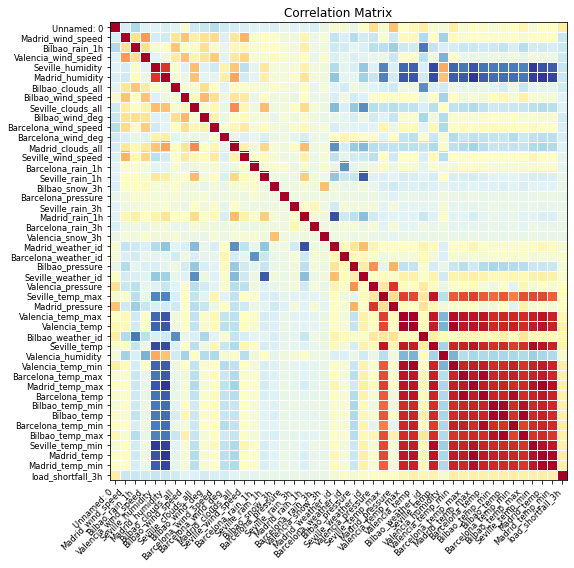

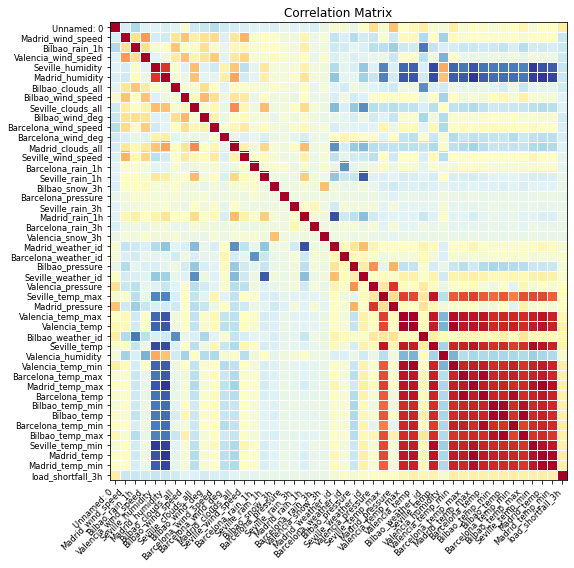

In [513]:
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(train_data.corr(), xnames = train_data.corr().columns, ax = ax)

It should be highlighted that there is a particularly high correlation between the various variables at the bottom right of the correlation matrix.  

In the following section, we shall look into the skewness and kurtosis of our dataset.

- Note: Additional/unnecessary columns should be dropped. 


<ipython-input-514-4ff04dc858ac>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.kurtosis().plot()


<AxesSubplot:>

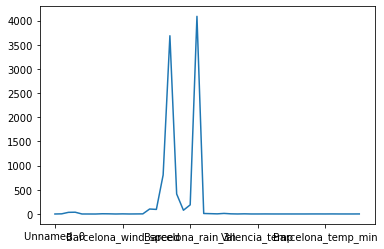

In [514]:
train_data.kurtosis().plot()

Furthermore, as can be gleaned from the below, there are numerous positive and negative symmetrical relationships between the various features.    

<ipython-input-515-f345c775149e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.skew(axis=0, skipna=True).plot()


<AxesSubplot:>

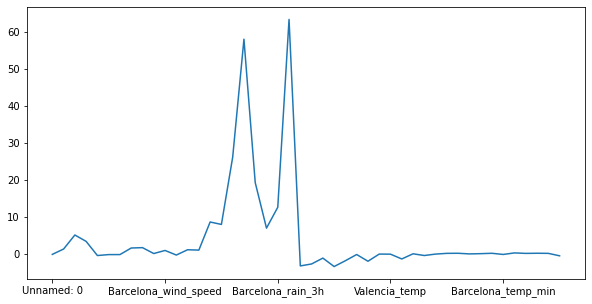

In [515]:
plt.figure(figsize = [10,5])
train_data.skew(axis=0, skipna=True).plot()

In [516]:
train_data.skew()

<ipython-input-516-c08583efac25>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### 4.1 Merge Data
    * Merge test and training data 
    * View head, tail and shape of data

In [517]:
# merge test and training data into one df
#df = pd.concat([train_data, test_data])

In [518]:
# view head
#df.head(2)

In [519]:
# view tail 
#df.tail(2)

In [520]:
# view shape
#print('df shape: {}'.format(df.shape))

#### 4.2 Missing Values
    * View missing values
    * Create a copy of df - To be safe
    * Impute missing values
    


In [521]:
# create copy of datasets
df_train = train_data
df_test = test_data

In [522]:
# view missing values in df_train
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [523]:
# view missing values in df_test
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

Valencia_pressure is the only feature in both df_train and df_test that contain missing 
values

In [524]:
# impute missing values using mode in df_train
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode()[0])

# impute missing values using mode in df_train
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [525]:
# view missing values again - to see if it worked
df_train.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [526]:
# view missing values again - to see if it worked
df_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

It worked!!

#### 4.3 Datatypes
    * View datatypes
    * Process Objects - drop and/or transform relevant features

In [527]:
# view datatypes
df_train.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

##### Features to be processed
    - time
    - Valencia_wind_deg
    - Seville_pressure
    - Unnamed: 0

##### time

In [528]:
# transform time from object into datetime for df_train
df_train['time'] = pd.to_datetime(df_train['time'], format='%Y-%m-%d %H:%M:%S')

# transform time from object into datetime for df_test
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S')

In [529]:
# view time transformation
df_train['time'].head(2)

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
Name: time, dtype: datetime64[ns]

##### Valencia_wind_deg

In [530]:
# view Valencia_wind_deg
df_train['Valencia_wind_deg'].head(2)

0     level_5
1    level_10
Name: Valencia_wind_deg, dtype: object

Transform by extracting last element in string. For example, level_5 is a string and the last element is equal to 5

In [531]:
# extract last element in df_train
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)')

# extract last element in df_test
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')

In [532]:
# transform Valencia_wind_deg from object into int in df_train
df_train['Valencia_wind_deg'] = pd.to_numeric(df_train['Valencia_wind_deg'])

# transform Valencia_wind_deg from object into int df)test
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

In [533]:
# view Valencia_wind_deg transformation
df_train['Valencia_wind_deg'].head(2)

0     5
1    10
Name: Valencia_wind_deg, dtype: int64

##### Seville_pressure

In [534]:
# view Seville_pressure
df_train['Seville_pressure'].head(2)

0    sp25
1    sp25
Name: Seville_pressure, dtype: object

In [535]:
# view unique values in Seville_pressure
df_train['Seville_pressure'].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

Transform by extracting last two elements in string. For example, sp25 is a string and the last two elements is equal to 25

In [536]:
# extract last element in df_train
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)')

# extract last element in df_test
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')

In [537]:
# transform Seville_pressure from object into int in df_train
df_train['Seville_pressure'] = pd.to_numeric(df_train['Seville_pressure'])

# transform Seville_pressure from object into int in df_test
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [538]:
# view Seville_pressure transformation 
df_train['Seville_pressure'].head(2)

0    25
1    25
Name: Seville_pressure, dtype: int64

#### 4.4 Feature Manipulation
    * Add relevant features for model performance
    * View new features
    * Drop irrelevant features

##### Add Features
    - time_day, time_month, time_year 

In [539]:
# Extract day, month and year from time in df_train
df_train['time_day'] = df_train['time'].dt.day 

df_train['time_month'] = df_train['time'].dt.month 
 
df_train['time_year'] = df_train['time'].dt.year 

In [540]:
# Extract day, month and year from time in df_test
df_test['time_day'] = df_test['time'].dt.day 

df_test['time_month'] = df_test['time'].dt.month 
 
df_test['time_year'] = df_test['time'].dt.year 

In [541]:
# view new date features
df_train[['time', 'time_day', 'time_month', 'time_year']].head()

,time,time_day,time_month,time_year
0,2015-01-01 03:00:00,1,1,2015
1,2015-01-01 06:00:00,1,1,2015
2,2015-01-01 09:00:00,1,1,2015
3,2015-01-01 12:00:00,1,1,2015
4,2015-01-01 15:00:00,1,1,2015


##### Drop Features
    * Unnamed: 0
    * time

In [542]:
# drop Unnamed: 0 in df_train
df_train = df_train.drop(['Unnamed: 0', 'time'], axis=1) 

# drop Unnamed: 0 in df_test
df_test = df_test.drop(['Unnamed: 0', 'time'], axis=1) 

#### 4.4 Cleaned Dataset
    * View cleaned dataset
    * View shape

In [566]:
# view cleaned df_train
df_train.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,time_day,time_month,time_year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015


In [567]:
# view cleaned df_test
df_test.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time_day,time_month,time_year
0,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,...,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15,1,1,2018
1,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,...,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15,1,1,2018


In [544]:
# view shape 
print('Shape')
print('df_train: {}'.format(df_train.shape))
print('df_test: {}'.format(df_test.shape))

Shape
df_train: (8763, 50)
df_test: (2920, 49)


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### 5.1 Model Preparation
    * Create x and y for train_test_split function - using training set
    * View head and shape

In [545]:
# Extract x and y
y = df_train[:][['load_shortfall_3h']]
x = df_train[:].drop('load_shortfall_3h', axis=1)

In [546]:
# view x 
x.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,time_day,time_month,time_year
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,2015
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,2015


In [547]:
# view y
y.head(2)

,load_shortfall_3h
0,6715.666667
1,4171.666667


In [548]:
# view datasets shape
print('x shape: {}'.format(x.shape))
print('y shape: {}'.format(y.shape))

x shape: (8763, 49)
y shape: (8763, 1)


#### 5.2 Load Model
    * Build model
    * Split data into 3 parts 
        - train set
        - validation set
        - test set
    * View data shape

In [549]:
# build model - Linear Regression
lr = LinearRegression()

In [550]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [551]:
# view shape of data
print('x_train shape: {} - training set'.format(x_train.shape))
print('y_train shape: {} - validation set'.format(y_train.shape))
print('x_test shape: {}  - training set '.format(x_test.shape))
print('y_test shape: {}  - validation set'.format(y_test.shape))

x_train shape: (6134, 49) - training set
y_train shape: (6134, 1) - validation set
x_test shape: (2629, 49)  - training set 
y_test shape: (2629, 1)  - validation set


#### 5.3 Fit model 
    * Fit model
    * Create prediction variable

In [552]:
# fit model 
lr.fit(x_train, y_train)

LinearRegression()

In [553]:
# predict
pred = lr.predict(x_test)

#### 5.4 Evaluate Model
    * Calculate and view prediction peformance
        - Mean Squared Error
        - r2 score

In [554]:
# mean squared error 
mse_eval = np.sqrt(MSE(y_test, pred))

In [555]:
# r2 score
r2_eval = r2(y_test, pred)

In [556]:
# view performance 
print('MSE: {}'.format(mse_eval))
print('r2: {}'.format(r2_eval))

MSE: 4826.001987831298
r2: 0.14415434402972538


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [557]:
# Compare model performance

In [558]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [559]:
# discuss chosen methods logic

## 7. Kaggle Submission

##### 7.1 Model Preparation
    * Make prediction on df_test - test set for submission
    * Create and view prediction variable

In [560]:
# prediction 
pred = lr.predict(df_test)

In [561]:
# create prediction variable
pred_var = pd.DataFrame(pred, columns=['load_shortfall_3h'])

In [562]:
# view pred_var
pred_var.head(3)

,load_shortfall_3h
0,7914.400118
1,7132.549067
2,8310.398861


##### 7.2 Output Dataframe - csv
    * Create dataframe
    * Create and view submission csv file

In [563]:
# create output
output = pd.DataFrame({'time': test_data['time']})

In [564]:
# submission
submission = output.join(pred_var)
submission.to_csv('submission.csv', index=False)

In [565]:
# view submission preview 
submission.head(3)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7914.400118
1,2018-01-01 03:00:00,7132.549067
2,2018-01-01 06:00:00,8310.398861
